In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split



In [27]:
df = pd.read_csv(r'C:/Users/akshi/Downloads/dataset.csv')
print (df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [28]:
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [39]:
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [41]:
df_2= df[['Id','LotArea','1stFlrSF','2ndFlrSF','BsmtFullBath','BsmtHalfBath','FullBath',
          'HalfBath','BedroomAbvGr','SaleCondition','SaleType','SalePrice']]
df_2.head()

,Id,LotArea,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,SaleCondition,SaleType,SalePrice
0,1,8450,856,854,1,0,2,1,3,Normal,WD,208500
1,2,9600,1262,0,0,1,2,0,3,Normal,WD,181500
2,3,11250,920,866,1,0,2,1,3,Normal,WD,223500
3,4,9550,961,756,1,0,1,0,3,Abnorml,WD,140000
4,5,14260,1145,1053,1,0,2,1,4,Normal,WD,250000


In [42]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   LotArea        1460 non-null   int64 
 2   1stFlrSF       1460 non-null   int64 
 3   2ndFlrSF       1460 non-null   int64 
 4   BsmtFullBath   1460 non-null   int64 
 5   BsmtHalfBath   1460 non-null   int64 
 6   FullBath       1460 non-null   int64 
 7   HalfBath       1460 non-null   int64 
 8   BedroomAbvGr   1460 non-null   int64 
 9   SaleCondition  1460 non-null   object
 10  SaleType       1460 non-null   object
 11  SalePrice      1460 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 137.0+ KB


In [43]:
duplicates = df_2.duplicated().sum()
print(duplicates)

0


In [44]:
df_2.describe()

,Id,LotArea,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,10516.828082,1162.626712,346.992466,0.425342,0.057534,1.565068,0.382877,2.866438,180921.195890
std,421.610009,9981.264932,386.587738,436.528436,0.518911,0.238753,0.550916,0.502885,0.815778,79442.502883
min,1.000000,1300.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,7553.500000,882.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,129975.000000
50%,730.500000,9478.500000,1087.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,163000.000000
75%,1095.250000,11601.500000,1391.250000,728.000000,1.000000,0.000000,2.000000,1.000000,3.000000,214000.000000
max,1460.000000,215245.000000,4692.000000,2065.000000,3.000000,2.000000,3.000000,2.000000,8.000000,755000.000000


In [45]:
X = df_2[['LotArea', 'BsmtFullBath','BsmtHalfBath','FullBath', 'HalfBath', 'BedroomAbvGr']]
y = df_2[['SalePrice']]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
print(model.intercept_, model.coef_, model.score(X_train, y_train))

[38146.05044817] [[ 1.18178643e+00  3.51926937e+04  5.62017522e+03  7.71356989e+04
   3.51570817e+04 -6.81794994e+03]] 0.4509928950877238


In [48]:
y_pred = model.predict(X_test)

<Axes: title={'center': 'Actual Prices vs. Predicted Prices'}, xlabel='SalePrice', ylabel='Predicted Prices'>

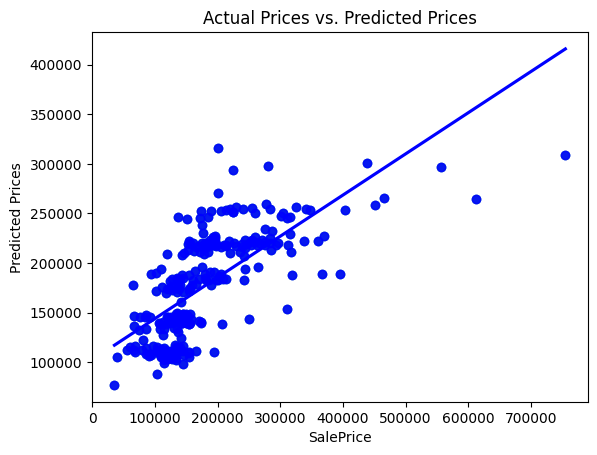

In [52]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
sns.regplot(x=y_test,y=y_pred, ci=None, color='blue')

In [53]:
Accuracy = r2_score(y_test, y_pred)*100
print("Accuracy of the model: %.2f" %Accuracy)

Accuracy of the model: 47.92
